In [26]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate non-linear dataset (curved data)
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Shallow Model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Shallow model
shallow_model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),  # One hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the shallow model
shallow_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Train the shallow model
shallow_history = shallow_model.fit(X_train, y_train,
                                    epochs=20,
                                    batch_size=16,
                                    validation_split=0.2,
                                    verbose=0)  # Keep it quiet for clean output


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Deep Model

In [28]:
# Deep model
deep_model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the deep model
deep_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the deep model
deep_history = deep_model.fit(X_train, y_train,
                              epochs=20,
                              batch_size=16,
                              validation_split=0.2,
                              verbose=0)


### Compare

In [29]:
# Evaluate shallow model
shallow_loss, shallow_acc = shallow_model.evaluate(X_test, y_test, verbose=0)

# Evaluate deep model
deep_loss, deep_acc = deep_model.evaluate(X_test, y_test, verbose=0)

print(f"Shallow Model Accuracy: {shallow_acc * 100:.2f}%")
print(f"Deep Model Accuracy: {deep_acc * 100:.2f}%")


Shallow Model Accuracy: 91.50%
Deep Model Accuracy: 100.00%


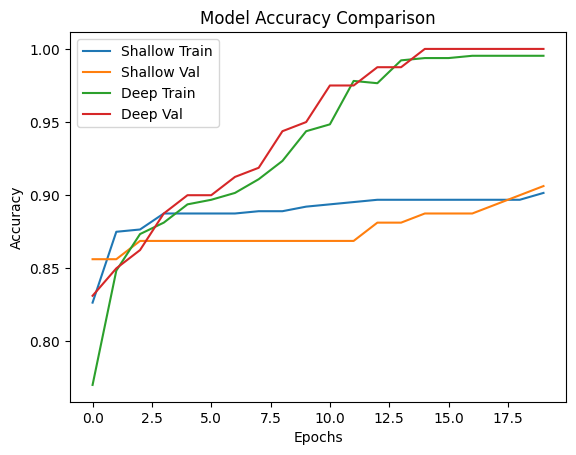

In [30]:
import matplotlib.pyplot as plt

# Plot shallow model accuracy
plt.plot(shallow_history.history['accuracy'], label='Shallow Train')
plt.plot(shallow_history.history['val_accuracy'], label='Shallow Val')

# Plot deep model accuracy
plt.plot(deep_history.history['accuracy'], label='Deep Train')
plt.plot(deep_history.history['val_accuracy'], label='Deep Val')

plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
